In [1]:
import pandas as pd

# Charger le fichier CSV des ventes historiques
data_historique = pd.read_csv("historique_ventes.csv")
data_historique.head()

,Date,Produit,Quantité,Prix_Unitaire,Montant_Total
0,2024-01-01,Produit_A,10,100,1000
1,2024-01-08,Produit_B,15,200,3000
2,2024-01-15,Produit_C,7,150,1050
3,2024-01-22,Produit_A,12,100,1200
4,2024-01-29,Produit_B,18,200,3600


In [2]:
data_historique['Date'] = pd.to_datetime(data_historique['Date'])

In [3]:
ventes_mensuelles = data_historique.resample('M', on='Date').sum()
ventes_mensuelles[['Quantité', 'Montant_Total']]

,Quantité,Montant_Total
Date,,
2024-01-31,62,9850
2024-02-29,37,5350
2024-03-31,20,2000


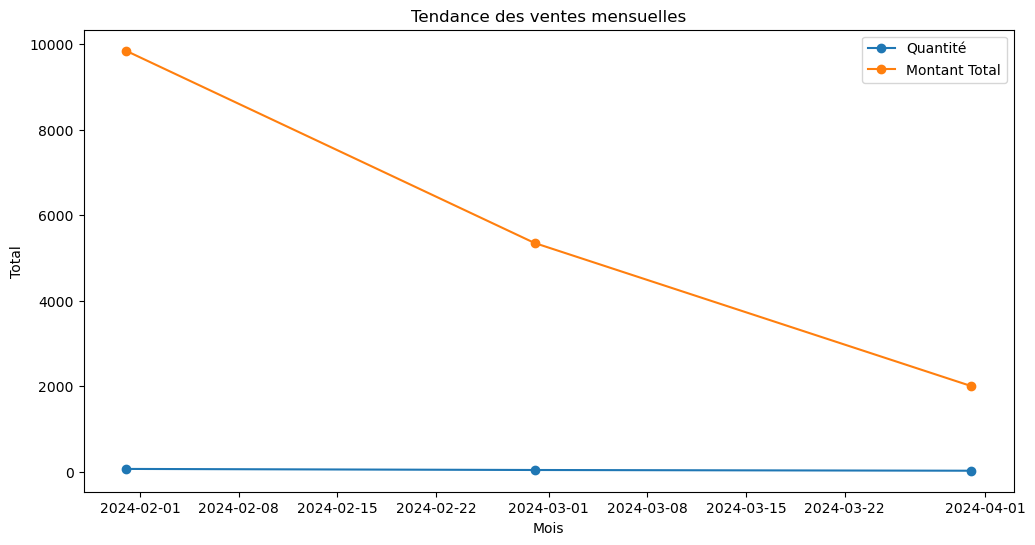

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ventes_mensuelles.index, ventes_mensuelles['Quantité'], marker='o', label="Quantité")
plt.plot(ventes_mensuelles.index, ventes_mensuelles['Montant_Total'], marker='o', label="Montant Total")
plt.title("Tendance des ventes mensuelles")
plt.xlabel("Mois")
plt.ylabel("Total")
plt.legend()
plt.show()

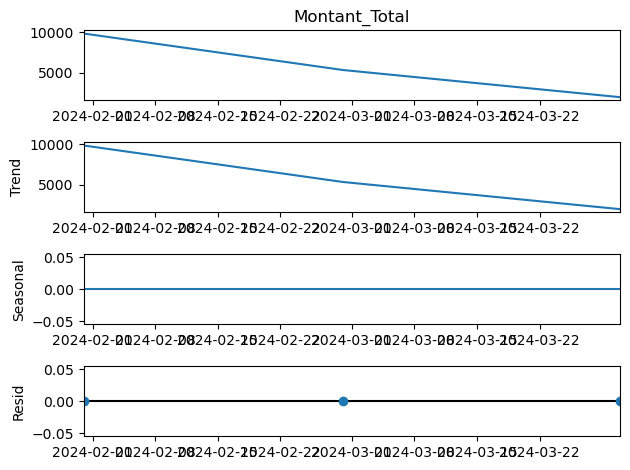

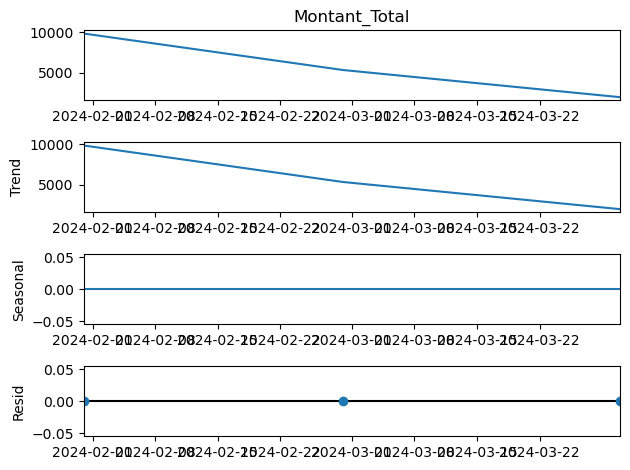

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ventes_mensuelles['Montant_Total'], model='additive', period=1)
decomposition.plot()

<AxesSubplot:title={'center':'Prévisions avec moyenne mobile'}, xlabel='Date'>

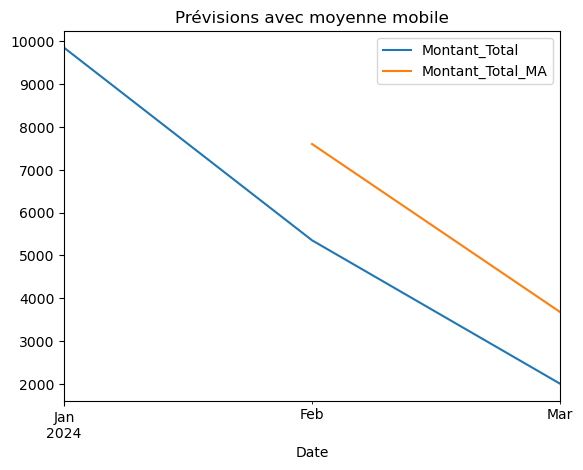

In [6]:
ventes_mensuelles['Montant_Total_MA'] = ventes_mensuelles['Montant_Total'].rolling(window=2).mean()
ventes_mensuelles[['Montant_Total', 'Montant_Total_MA']].plot(title="Prévisions avec moyenne mobile")